<a href="https://colab.research.google.com/github/anyelyra/End-Term-Task/blob/main/EndTermTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Anyelyra Kantata

NPM: 2206048625

Kode ini merupakan adaptas dari Notebook Kaggle: https://www.kaggle.com/code/anandhuh/image-classification-using-cnn-for-beginners

# Import Library

Import library yang ingin digunakan.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Loading Dataset

Dataset yang akan digunakan adalah `CIFAR10` yang merupakan dataset 60000 32x32 gambar berwarna dalam 10 kelas, dengan 6000 gambar per kelas. Dataset ini diambil dari https://www.cs.toronto.edu/~kriz/cifar.html.

Terdapat 50000 gambar untuk training dan 10000 gambar untuk testing.

In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# Normalisasi Data

 Membagi nilai piksel pada dataset gambar (`x_train` dan `x_test`) dengan 255, sehingga nilainya berada dalam rentang 0 hingga 1.

 Hal ini membantu model pembelajaran mesin bekerja lebih efisien dengan mempercepat proses pelatihan dan menjaga stabilitas perhitungan.

In [ ]:
# Normalize the data (scale pixel values to 0-1 range)
x_train = x_train / 255.0
x_test = x_test / 255.0

Melihat 25 gambar pertama dalam dataset, beserta label yang menyertainya.

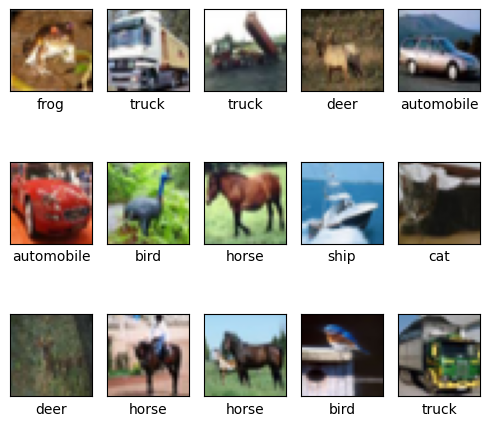

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(5, 5))  # Adjust figure size
for i in range(15):  # Display 15 images
    plt.subplot(3, 5, i + 1)  # Create a grid with 3 rows and 5 columns
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])  # Display the image
    label_index = y_train[i][0]  # Get the label index
    plt.xlabel(class_names[label_index])  # Use the class name as the label
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

# Arsitektur Model

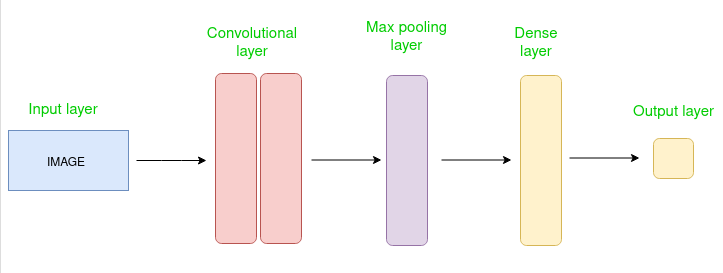

## Convolutional Layer & Max Pooling Layer



In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

## Dense Layer

In [ ]:
model.add(layers.Flatten()) # Meratakan output dari layer sebelumnya
model.add(layers.Dense(64, activation='relu')) # Transformasi data secara non-linear
model.add(layers.Dense(10, activation='softmax')) # Untuk menghasilkan prediksi probabilitas tiap kelas

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 126,730 (495.04 KB)

 Trainable params: 126,730 (495.04 KB)

 Non-trainable params: 0 (0.00 B)

## Output Layer

In [ ]:
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 10 epochs
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 85ms/step - accuracy: 0.3050 - loss: 1.8473 - val_accuracy: 0.5020 - val_loss: 1.3745
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 85ms/step - accuracy: 0.5394 - loss: 1.2885 - val_accuracy: 0.5611 - val_loss: 1.2270
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 84ms/step - accuracy: 0.6074 - loss: 1.1029 - val_accuracy: 0.6312 - val_loss: 1.0306
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.6565 - loss: 0.9813 - val_accuracy: 0.6535 - val_loss: 0.9863
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 86ms/step - accuracy: 0.6874 - loss: 0.8890 - val_accuracy: 0.6776 - val_loss: 0.9223
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.7114 - loss: 0.8188 - val_accuracy: 0.6820 - val_loss: 0.9033
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 87ms/step - accuracy: 0.7314 - loss: 0.7698 - val_accuracy: 0.6933 - val_loss: 0.8841
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.7459 - loss: 0.7161 - val_accurac

313/313 - 3s - 11ms/step - accuracy: 0.7113 - loss: 0.8428


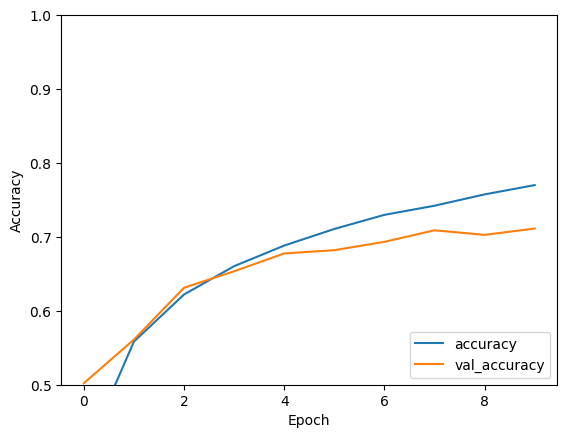

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,
                                     y_test,
                                     verbose=2)

In [ ]:
print('Test Accuracy is',test_acc)